In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf

In [23]:

start = '2020-01-01'
end = '2024-01-01'

df = yf.download('TSLA', start=start, end=end)
df.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-02,28.299999,28.713333,28.114000,28.684000,28.684000,142981500
2020-01-03,29.366667,30.266666,29.128000,29.534000,29.534000,266677500
2020-01-06,29.364668,30.104000,29.333332,30.102667,30.102667,151995000
2020-01-07,30.760000,31.441999,30.224001,31.270666,31.270666,268231500
2020-01-08,31.580000,33.232666,31.215334,32.809334,32.809334,467164500


In [7]:
df.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-12-22,256.760010,258.220001,251.369995,252.539993,252.539993,93249800
2023-12-26,254.490005,257.970001,252.910004,256.609985,256.609985,86892400
2023-12-27,258.350006,263.339996,257.519989,261.440002,261.440002,106494400
2023-12-28,263.660004,265.130005,252.710007,253.179993,253.179993,113619900
2023-12-29,255.100006,255.190002,247.429993,248.479996,248.479996,100615300


In [25]:
df=df.reset_index()
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-01-02,28.299999,28.713333,28.114000,28.684000,28.684000,142981500
1,2020-01-03,29.366667,30.266666,29.128000,29.534000,29.534000,266677500
2,2020-01-06,29.364668,30.104000,29.333332,30.102667,30.102667,151995000
3,2020-01-07,30.760000,31.441999,30.224001,31.270666,31.270666,268231500
4,2020-01-08,31.580000,33.232666,31.215334,32.809334,32.809334,467164500


In [11]:
df=df.drop(['Date','Adj Close'],axis=1)
df.head()

,Open,High,Low,Close,Volume
0,1.266667,1.666667,1.169333,1.592667,281494500
1,1.719333,2.028000,1.553333,1.588667,257806500
2,1.666667,1.728000,1.351333,1.464000,123282000
3,1.533333,1.540000,1.247333,1.280000,77097000
4,1.333333,1.333333,1.055333,1.074000,103003500


In [27]:
ma100=df.Close.rolling(100).mean()
ma100

0              NaN
1              NaN
2              NaN
3              NaN
4              NaN
           ...    
1001    241.505100
1002    241.477999
1003    241.553799
1004    241.571099
1005    241.558899
Name: Close, Length: 1006, dtype: float64

In [29]:
ma200=df.Close.rolling(200).mean()
ma200

0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
          ...    
1001    227.70775
1002    228.12360
1003    228.55840
1004    228.90800
1005    229.24815
Name: Close, Length: 1006, dtype: float64

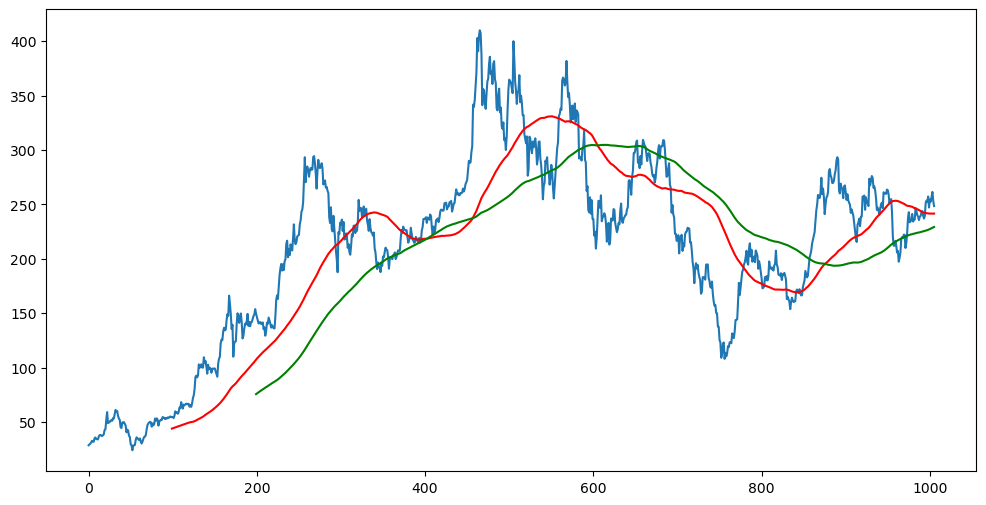

In [31]:
plt.figure(figsize=(12,6))
plt.plot(df.Close)
plt.plot(ma100,'r')#100 DAY MOVING AVG
plt.plot(ma200,'g')


In [35]:
df.shape


(1006, 7)

In [39]:
#splitting data into training and testing

# Correct the slicing syntax for data_testing
data_training = pd.DataFrame(df['Close'][0:int(len(df)*0.70)])
data_testing = pd.DataFrame(df['Close'][int(len(df)*0.70):int(len(df))])

# Print the shapes of the training and testing data
print(data_training.shape)
print(data_testing.shape)

(704, 1)
(302, 1)


In [41]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))


In [43]:
data_training_array=scaler.fit_transform(data_training)
data_training_array

array([[0.01192745],
       [0.01413016],
       [0.01560381],
       [0.01863059],
       [0.02261792],
       [0.0207521 ],
       [0.02020099],
       [0.02827067],
       [0.03052694],
       [0.02717191],
       [0.02630638],
       [0.02578982],
       [0.03213016],
       [0.03599312],
       [0.0364492 ],
       [0.03517422],
       [0.03399944],
       [0.03553356],
       [0.03796777],
       [0.04830237],
       [0.04998851],
       [0.07234902],
       [0.09084485],
       [0.06452293],
       [0.06698651],
       [0.06683275],
       [0.07084254],
       [0.0713781 ],
       [0.07015323],
       [0.07649529],
       [0.07580943],
       [0.08589351],
       [0.09608989],
       [0.09297846],
       [0.09325315],
       [0.08164185],
       [0.07578869],
       [0.0721417 ],
       [0.05490012],
       [0.05299801],
       [0.06606397],
       [0.06639048],
       [0.0670798 ],
       [0.06276767],
       [0.05912932],
       [0.04263406],
       [0.04908324],
       [0.047

In [45]:
data_training_array


array([[0.01192745],
       [0.01413016],
       [0.01560381],
       [0.01863059],
       [0.02261792],
       [0.0207521 ],
       [0.02020099],
       [0.02827067],
       [0.03052694],
       [0.02717191],
       [0.02630638],
       [0.02578982],
       [0.03213016],
       [0.03599312],
       [0.0364492 ],
       [0.03517422],
       [0.03399944],
       [0.03553356],
       [0.03796777],
       [0.04830237],
       [0.04998851],
       [0.07234902],
       [0.09084485],
       [0.06452293],
       [0.06698651],
       [0.06683275],
       [0.07084254],
       [0.0713781 ],
       [0.07015323],
       [0.07649529],
       [0.07580943],
       [0.08589351],
       [0.09608989],
       [0.09297846],
       [0.09325315],
       [0.08164185],
       [0.07578869],
       [0.0721417 ],
       [0.05490012],
       [0.05299801],
       [0.06606397],
       [0.06639048],
       [0.0670798 ],
       [0.06276767],
       [0.05912932],
       [0.04263406],
       [0.04908324],
       [0.047

In [47]:
data_training_array.shape

(704, 1)

In [100]:
x_train=[]
y_train=[]
time_steps=100
for i in range(100,data_training_array.shape[0]):
    x_train.append(data_training_array[i-time_steps:i,0])
    y_train.append(data_training_array[i:0])

x_train

[array([0.01192745, 0.01413016, 0.01560381, 0.01863059, 0.02261792,
        0.0207521 , 0.02020099, 0.02827067, 0.03052694, 0.02717191,
        0.02630638, 0.02578982, 0.03213016, 0.03599312, 0.0364492 ,
        0.03517422, 0.03399944, 0.03553356, 0.03796777, 0.04830237,
        0.04998851, 0.07234902, 0.09084485, 0.06452293, 0.06698651,
        0.06683275, 0.07084254, 0.0713781 , 0.07015323, 0.07649529,
        0.07580943, 0.08589351, 0.09608989, 0.09297846, 0.09325315,
        0.08164185, 0.07578869, 0.0721417 , 0.05490012, 0.05299801,
        0.06606397, 0.06639048, 0.0670798 , 0.06276767, 0.05912932,
        0.04263406, 0.04908324, 0.04716559, 0.03443653, 0.03202997,
        0.01448604, 0.01191708, 0.        , 0.01147481, 0.01145581,
        0.01262368, 0.02483964, 0.03075671, 0.02884079, 0.02645669,
        0.02434381, 0.0281221 , 0.02079011, 0.01611   , 0.02052233,
        0.02678147, 0.03182784, 0.03241349, 0.03658741, 0.05005416,
        0.06023672, 0.06368158, 0.06633865, 0.06

In [102]:
y_train

[array([], shape=(0, 1), dtype=float64),
 array([], shape=(0, 1), dtype=float64),
 array([], shape=(0, 1), dtype=float64),
 array([], shape=(0, 1), dtype=float64),
 array([], shape=(0, 1), dtype=float64),
 array([], shape=(0, 1), dtype=float64),
 array([], shape=(0, 1), dtype=float64),
 array([], shape=(0, 1), dtype=float64),
 array([], shape=(0, 1), dtype=float64),
 array([], shape=(0, 1), dtype=float64),
 array([], shape=(0, 1), dtype=float64),
 array([], shape=(0, 1), dtype=float64),
 array([], shape=(0, 1), dtype=float64),
 array([], shape=(0, 1), dtype=float64),
 array([], shape=(0, 1), dtype=float64),
 array([], shape=(0, 1), dtype=float64),
 array([], shape=(0, 1), dtype=float64),
 array([], shape=(0, 1), dtype=float64),
 array([], shape=(0, 1), dtype=float64),
 array([], shape=(0, 1), dtype=float64),
 array([], shape=(0, 1), dtype=float64),
 array([], shape=(0, 1), dtype=float64),
 array([], shape=(0, 1), dtype=float64),
 array([], shape=(0, 1), dtype=float64),
 array([], shape

In [74]:
x_train.shape

AttributeError: 'list' object has no attribute 'shape'

In [55]:
x_train.shape

AttributeError: 'list' object has no attribute 'shape'

In [57]:
x_train,y_train=np.array(x_train),np.array(y_train)

ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 1 dimensions. The detected shape was (1208,) + inhomogeneous part.

In [84]:
x_train = np.array(x_train)
y_train = np.array(y_train)

x_train.shape

(604, 100, 1)

In [78]:
x_train,y_train=np.array(x_train),np.array(y_train)

In [82]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM



In [104]:
model=Sequential()
model.add(LSTM(units=50,activation='relu',return_sequences=True,input_shape=(x_train.shape[1],1)))
model.add(Dropout(0.2))

model.add(LSTM(units=60,activation='relu',return_sequences=True))
model.add(Dropout(0.3))


model.add(LSTM(units=80,activation='relu',return_sequences=True))
model.add(Dropout(0.4))

model.add(LSTM(units=120,activation='relu',return_sequences=True))
model.add(Dropout(0.5))

model.add(Dense(units=1))

AttributeError: 'list' object has no attribute 'shape'

In [106]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [110]:
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(x_train,y_train,epochs=50)

ValueError: Data cardinality is ambiguous. Make sure all arrays contain the same number of samples.'x' sizes: 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100
'y' sizes: 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0


In [96]:
x_train.shape


(604, 100, 1)

In [98]:
y_train.shape

(604, 0, 1)

In [112]:
import numpy as np

# Assume data_training_array is a 2D NumPy array with your training data
# The first dimension is the number of samples, the second is the number of features (e.g., Close prices)
time_steps = 100

# Initialize lists to store the sequences and corresponding outputs
x_train = []
y_train = []

# Populate the sequences and corresponding outputs
for i in range(time_steps, len(data_training_array)):
    # x_train is the sequence of the previous 'time_steps' data points
    x_train.append(data_training_array[i-time_steps:i, 0])  # 0 to get the Close price if it's a single feature

    # y_train is the data point immediately following the sequence
    y_train.append(data_training_array[i, 0])  # 0 to get the Close price if it's a single feature

# Convert to NumPy arrays
x_train = np.array(x_train)
y_train = np.array(y_train)

# Reshape x_train to 3D (samples, time_steps, features)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

# Reshape y_train to 2D if necessary (samples, 1)
y_train = np.reshape(y_train, (y_train.shape[0], 1))

print("x_train shape:", x_train.shape)  # Expected: (number_of_samples, time_steps, 1)
print("y_train shape:", y_train.shape)  # Expected: (number_of_samples, 1)


x_train shape: (604, 100, 1)
y_train shape: (604, 1)


In [114]:
model=Sequential()
model.add(LSTM(units=50,activation='relu',return_sequences=True,input_shape=(x_train.shape[1],1)))
model.add(Dropout(0.2))

model.add(LSTM(units=60,activation='relu',return_sequences=True))
model.add(Dropout(0.3))


model.add(LSTM(units=80,activation='relu',return_sequences=True))
model.add(Dropout(0.4))

model.add(LSTM(units=120,activation='relu',return_sequences=True))
model.add(Dropout(0.5))

model.add(Dense(units=1))

C:\Users\Priyanshu Bhati\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [116]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [118]:
model.fit(x_train, y_train, epochs=50, batch_size=32)


Epoch 1/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 20s 248ms/step - loss: 0.2225
Epoch 2/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 5s 244ms/step - loss: 0.0538
Epoch 3/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 6s 318ms/step - loss: 0.0436
Epoch 4/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 6s 285ms/step - loss: 0.0370
Epoch 5/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 5s 262ms/step - loss: 0.0307
Epoch 6/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 5s 248ms/step - loss: 0.0267
Epoch 7/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 5s 237ms/step - loss: 0.0261
Epoch 8/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 4s 218ms/step - loss: 0.0246
Epoch 9/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 4s 221ms/step - loss: 0.0258
Epoch 10/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 4s 214ms/step - loss: 0.0251
Epoch 11/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 4s 227ms/step - loss: 0.0231
Epoch 12/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 4s 226ms/step - loss: 0.0207
Epoch 13/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 4s 227ms/step - loss: 0.0218
Epoch 14/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 4s 224ms/step - loss: 0.0209
Epoch 15/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 4s 221ms/step - l

In [120]:
model.save('keras_model.h5')

In [122]:
data_testing.head()

,Close
704,220.190002
705,222.039993
706,207.279999
707,214.440002
708,211.250000


In [124]:
data_testing.tail()

,Close
1001,252.539993
1002,256.609985
1003,261.440002
1004,253.179993
1005,248.479996


In [126]:
past_100_days=data_training.tail(100)

In [128]:
final_df=past_100_days.append(data_testing,ignore_index=True)
final_df.head()

AttributeError: 'DataFrame' object has no attribute 'append'

In [130]:
final_df=past_100_days.append(data_testing,ignore_index=True)

AttributeError: 'DataFrame' object has no attribute 'append'

In [132]:
import pandas as pd

# Assuming past_100_days and data_testing are both DataFrames
final_df = past_100_days.append(data_testing, ignore_index=True)


AttributeError: 'DataFrame' object has no attribute 'append'

In [134]:
print(type(past_100_days))  # Should output: <class 'pandas.core.frame.DataFrame'>
print(type(data_testing))   # Should output: <class 'pandas.core.frame.DataFrame'>


<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>


In [136]:
final_df = pd.concat([past_100_days, data_testing], ignore_index=True)

In [138]:
final_df.head()

,Close
0,219.600006
1,235.910004
2,253.210007
3,252.753326
4,246.789993


In [140]:
input_data=scaler.fit_transform(final_df)
input_data

array([[0.55411988],
       [0.63517543],
       [0.72115099],
       [0.71888143],
       [0.68924555],
       [0.74661236],
       [0.62825096],
       [0.64695356],
       [0.64996854],
       [0.66477817],
       [0.65404364],
       [0.61688695],
       [0.53492029],
       [0.56053074],
       [0.62071363],
       [0.52181693],
       [0.54000592],
       [0.64077459],
       [0.6360534 ],
       [0.63100091],
       [0.68386175],
       [0.67995226],
       [0.61904048],
       [0.59830038],
       [0.57833875],
       [0.59220422],
       [0.62104493],
       [0.61441871],
       [0.67808036],
       [0.70899181],
       [0.62738959],
       [0.62106154],
       [0.64079112],
       [0.64711925],
       [0.65583273],
       [0.65821815],
       [0.68298377],
       [0.69277406],
       [0.81307355],
       [0.81574069],
       [0.79680605],
       [0.7492296 ],
       [0.82854588],
       [0.85876149],
       [0.93951887],
       [0.94014842],
       [0.95659807],
       [0.990

In [142]:
input_data.shape


(402, 1)

In [230]:
x_test = []
y_test = []

# Iterate through the dataset, starting from the 100th element
for i in range(100, input_data.shape[0]):
    x_test.append(input_data[i-100:i, 0])  # Collect the previous 100 values for x_test
    y_test.append(input_data[i, 0])        # Collect the current value for y_test

# Convert the lists to NumPy arrays
x_test = np.array(x_test)
y_test = np.array(y_test)

# Reshape y_test to be 2D (optional, depending on your model's requirements)
y_test = y_test.reshape(-1, 1)

# Check the shapes to ensure correctness
print("x_test shape:", x_test.shape)  # Should be (number_of_samples, 100)
print("y_test shape:", y_test.shape)  # Should be (number_of_samples, 1)



x_test shape: (302, 100)
y_test shape: (302, 1)


In [232]:
x_test,y_test=np.array(x_test),np.array(y_test)

In [234]:
print(x_test.shape)
print(y_test.shape)

(302, 100)
(302, 1)


In [236]:
y_test.shape

(302, 1)

In [238]:
y_test


array([[0.55705198],
       [0.56624585],
       [0.49289333],
       [0.52847629],
       [0.51262298],
       [0.56813435],
       [0.57916706],
       [0.5814034 ],
       [0.59844946],
       [0.59357912],
       [0.5949707 ],
       [0.53115989],
       [0.53279989],
       [0.49383758],
       [0.44220256],
       [0.41347779],
       [0.34534338],
       [0.41059536],
       [0.43668621],
       [0.41173837],
       [0.42898318],
       [0.39171055],
       [0.37307423],
       [0.35826459],
       [0.29703804],
       [0.30717624],
       [0.37322331],
       [0.37153364],
       [0.37183181],
       [0.36144519],
       [0.43037469],
       [0.43037469],
       [0.43116986],
       [0.36949605],
       [0.35642583],
       [0.32770098],
       [0.32471922],
       [0.35259915],
       [0.29678961],
       [0.26264783],
       [0.24202367],
       [0.24634727],
       [0.2093728 ],
       [0.20758371],
       [0.14759966],
       [0.14645665],
       [0.08572706],
       [0.074

In [240]:
y_predicted=model.predict(x_test)

10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step


In [242]:
y_predicted.shape

(302, 1)

In [244]:
y_tes

array([[0.55705198],
       [0.56624585],
       [0.49289333],
       [0.52847629],
       [0.51262298],
       [0.56813435],
       [0.57916706],
       [0.5814034 ],
       [0.59844946],
       [0.59357912],
       [0.5949707 ],
       [0.53115989],
       [0.53279989],
       [0.49383758],
       [0.44220256],
       [0.41347779],
       [0.34534338],
       [0.41059536],
       [0.43668621],
       [0.41173837],
       [0.42898318],
       [0.39171055],
       [0.37307423],
       [0.35826459],
       [0.29703804],
       [0.30717624],
       [0.37322331],
       [0.37153364],
       [0.37183181],
       [0.36144519],
       [0.43037469],
       [0.43037469],
       [0.43116986],
       [0.36949605],
       [0.35642583],
       [0.32770098],
       [0.32471922],
       [0.35259915],
       [0.29678961],
       [0.26264783],
       [0.24202367],
       [0.24634727],
       [0.2093728 ],
       [0.20758371],
       [0.14759966],
       [0.14645665],
       [0.08572706],
       [0.074

In [162]:
y_predicted

array([[[0.4520507 ],
        [0.6132773 ],
        [0.64003795],
        ...,
        [0.63959986],
        [0.6321621 ],
        [0.6248958 ]],

       [[0.45453876],
        [0.61888874],
        [0.64651865],
        ...,
        [0.6321621 ],
        [0.6248959 ],
        [0.61806595]],

       [[0.45720106],
        [0.62296027],
        [0.65052396],
        ...,
        [0.6248959 ],
        [0.618066  ],
        [0.6118968 ]],

       ...,

       [[0.45730066],
        [0.6229809 ],
        [0.6505993 ],
        ...,
        [0.63187706],
        [0.6333352 ],
        [0.6347273 ]],

       [[0.4569317 ],
        [0.62223953],
        [0.6495009 ],
        ...,
        [0.6333354 ],
        [0.63472754],
        [0.63614285]],

       [[0.45666426],
        [0.6210755 ],
        [0.64812374],
        ...,
        [0.63472766],
        [0.636143  ],
        [0.63747156]]], dtype=float32)

In [246]:
scaler.scale_

array([0.00496968])

In [248]:
scale_factor=1/0.00496968
y_predicted=y_predicted*scale_factor
y_test=y_test*scale_factor

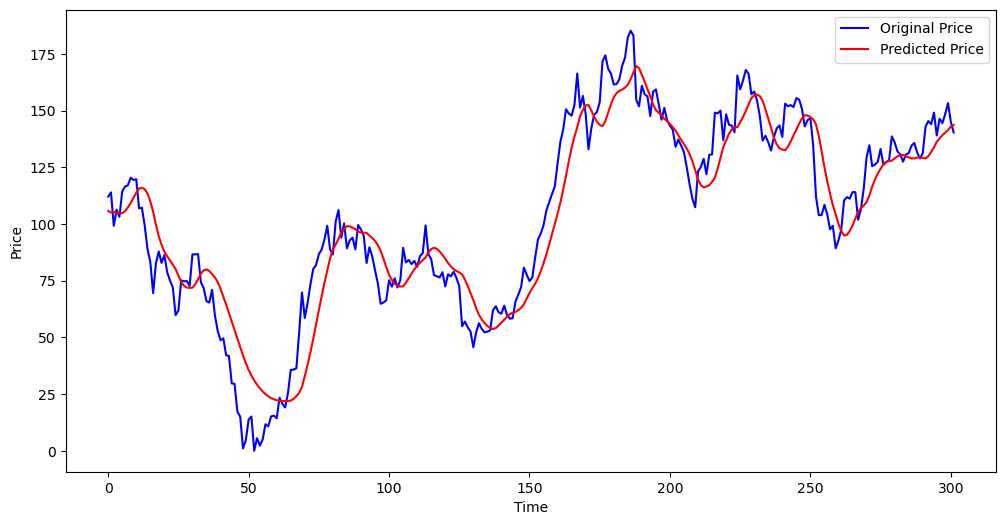

In [250]:
plt.figure(figsize=(12,6))
plt.plot(y_test,'b',label='Original Price')
plt.plot(y_predicted,'r',label='Predicted Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()
#PLOTTING A CURVE BETWEEN PREDICTEDS AND ORIGINAL PRICE 


In [172]:
import numpy as np

# Assume data_training_array is a 2D NumPy array with your training data
time_steps = 100
x_train = []
y_train = []

# Creating sequences
for i in range(time_steps, len(data_training_array)):
    x_train.append(data_training_array[i-time_steps:i, 0])
    y_train.append(data_training_array[i, 0])  # No zero-length slices

# Convert to NumPy arrays
x_train = np.array(x_train)
y_train = np.array(y_train)

# Reshape x_train if necessary
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

# y_train should be 2D (samples, 1)
y_train = np.reshape(y_train, (y_train.shape[0], 1))

print("x_train shape:", x_train.shape)
print("y_train shape:", y_train.shape)


x_train shape: (604, 100, 1)
y_train shape: (604, 1)


In [174]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dropout, Dense

# Initialize the model
model = Sequential()

# Add the first LSTM layer
model.add(LSTM(units=50, activation='relu', return_sequences=True, input_shape=(x_train.shape[1], 1)))

# Add a Dropout layer
model.add(Dropout(0.2))

# Add a second LSTM layer
model.add(LSTM(units=50, activation='relu'))

# Add another Dropout layer
model.add(Dropout(0.2))

# Add a Dense layer to output the prediction
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(x_train, y_train, epochs=50, batch_size=32)


C:\Users\Priyanshu Bhati\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 11s 87ms/step - loss: 0.2117
Epoch 2/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 2s 89ms/step - loss: 0.0176
Epoch 3/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 2s 94ms/step - loss: 0.0133
Epoch 4/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 2s 86ms/step - loss: 0.0121
Epoch 5/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 2s 87ms/step - loss: 0.0083
Epoch 6/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 2s 86ms/step - loss: 0.0087
Epoch 7/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 2s 87ms/step - loss: 0.0100
Epoch 8/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 3s 81ms/step - loss: 0.0096
Epoch 9/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 2s 89ms/step - loss: 0.0080
Epoch 10/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 2s 86ms/step - loss: 0.0068
Epoch 11/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 2s 87ms/step - loss: 0.0082
Epoch 12/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 2s 88ms/step - loss: 0.0078
Epoch 13/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 2s 94ms/step - loss: 0.0072
Epoch 14/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 2s 86ms/step - loss: 0.0073
Epoch 15/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 3s 87ms/step - loss: 0.0068
Epo

ValueError: x and y can be no greater than 2D, but have shapes (302,) and (302, 0, 1)

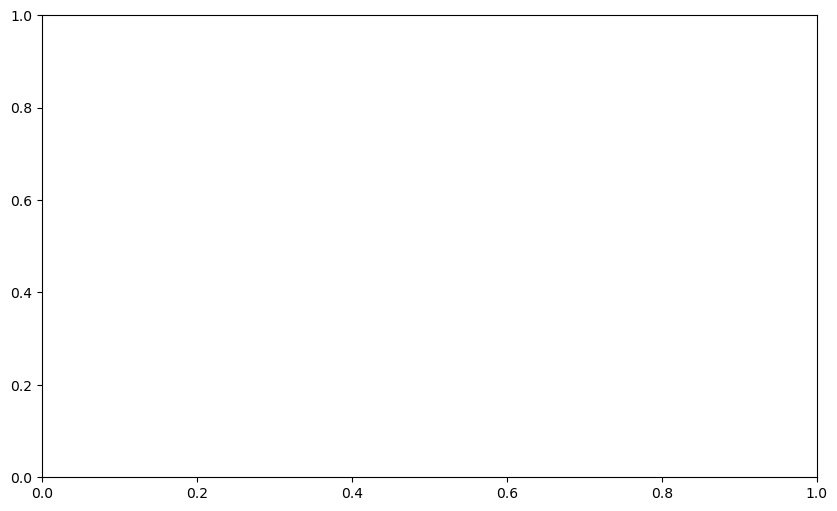

In [180]:
time_index = range(len(y_test))

# Plot y_test and y_predicted
plt.figure(figsize=(10, 6))
plt.plot(time_index, y_test, color='blue', label='Actual')
plt.plot(time_index, y_predicted, color='red', label='Predicted')

# Add titles and labels
plt.title('Actual vs Predicted')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()

# Show the plot
plt.show()

In [178]:
print("Length of y_test:", len(y_test))
print("Length of y_predicted:", len(y_predicted))


Length of y_test: 302
Length of y_predicted: 302


In [182]:
y_test


array([], shape=(302, 0, 1), dtype=float64)

In [184]:
# Assuming data_testing_array is your test data after splitting
x_test = []
y_test = []

for i in range(100, len(data_testing_array)):
    x_test.append(data_testing_array[i-100:i, 0])  # Use appropriate slicing here
    y_test.append(data_testing_array[i, 0])

# Convert to NumPy arrays
x_test = np.array(x_test)ray(y_test)


NameError: name 'data_testing_array' is not defined